<a href="https://colab.research.google.com/github/jonathasw/Data.science/blob/main/Analise_explorat%C3%B3ria_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No primeiro projeto do curso data Science na prática, é solicitado que seja escolhido uma cidade e analisado as locações disponíveis no site http://insideairbnb.com/get-the-data.html . Minha escolha foi a cidade de Paris e os dados foram fornecidos no dia 08 de janeiro de 2022.
<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Paris está entre as 10 cidades mais visitadas do mundo sendo a segunda na Europa com mais de 16 milhões de turistas (atrás apenas de Londres). Cidade conhecida por diversos pontos turísticos como a Torre Eiffel, Museu do Louvre entre tantos outros também sediará as próximas Olimpíadas em 2024.

Fontes:
https://www.ie.com.br/intercambio/cidades-mais-visitadas-mundo/
https://www.fortraveladvicelovers.com/pt/as-25-cidades-mais-visitadas-na-europa-ranking-oficial-2021

## Obtenção dos Dados

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

In [26]:
# Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [2]:
# Importar o arquivo do portal InsideAirbnb
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2022-01-08/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,80,2,277,2022-01-04,1.82,1,66,45,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,105,10,290,2021-12-30,2.21,4,212,20,7510400829623
2,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.04,1,365,0,7510903576564
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,148,0,"Available with a mobility lease only (""bail mo..."
4,9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86373,2.37093,Entire home/apt,80,4,34,2021-12-28,0.32,1,212,8,7511101582862


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Conseguimos verificar que esta base possuí 49255 entradas para locação e 18 variáveis.

In [4]:
# Volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# Confirmar o tipo de variável
display(df.dtypes)

Entradas:	 49255
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **2. Qual a porcentagem de valores ausentes no *dataset*?**
Nesta etapa podemos verificar que temos 6 colunas das 18 disponíveis com algum valor faltante sendo `neighbourhood_group` a maior com 100% dos seus valores seguida da coluna `license` com mais de 42% 

In [5]:
# Ordenar em ordem decresente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
license                            42.793625
reviews_per_month                  20.818191
last_review                        20.818191
name                                0.087301
host_name                           0.056847
longitude                           0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

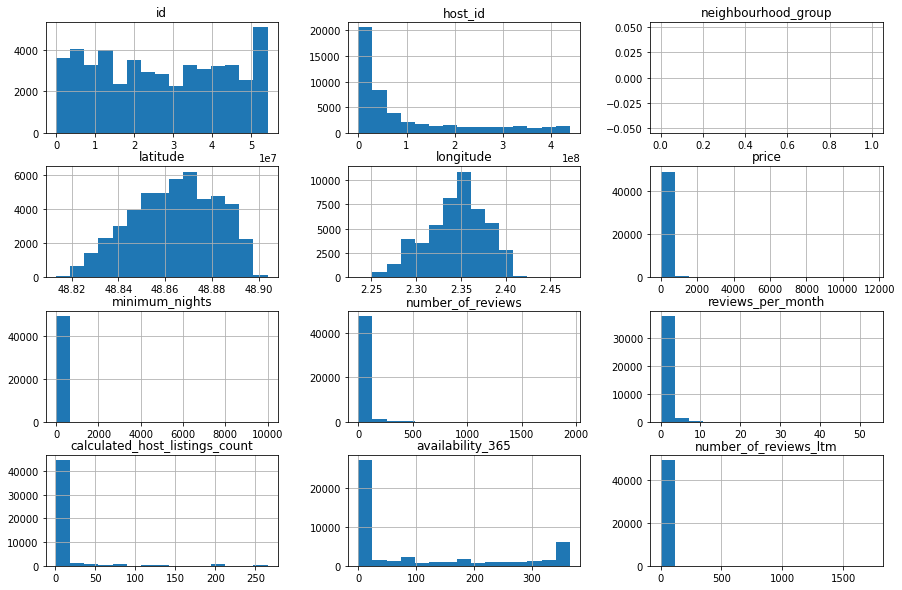

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [7]:
# Resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,49255.000000,49255.000000,49255.000000,39001.000000,49255.000000,49255.000000
mean,128.662958,107.989524,22.001746,0.803106,9.883118,103.157629
std,228.886467,168.112081,46.790986,1.181524,33.269320,136.944962
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,2.000000,1.000000,0.120000,1.000000,0.000000
50%,90.000000,4.000000,6.000000,0.380000,1.000000,3.000000
75%,135.000000,365.000000,22.000000,1.000000,2.000000,208.000000
max,11600.000000,9999.000000,1943.000000,53.040000,265.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 135, porém seu valor máximo é 11600.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano incluindo o valor máximo irreal de 9999 dias.

#### Boxplot para minimum_nights

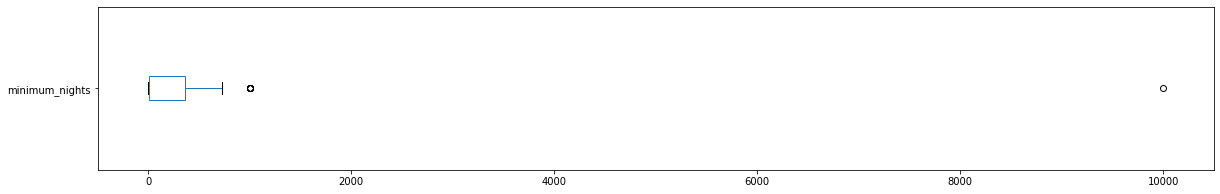

minimum_nights: valores acima de 30:
14681 entradas
29.8061%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(20,3))
plt.show()

# Ver quantidade de valores acima de 30 dias
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

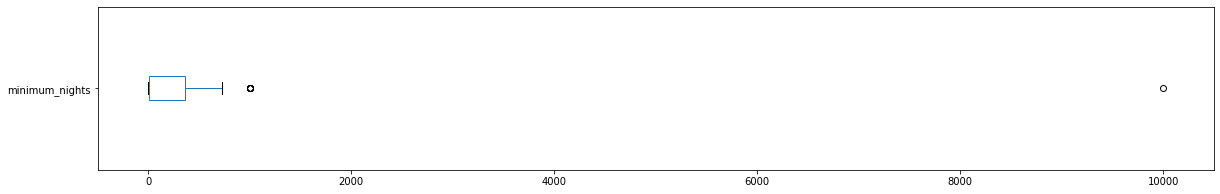

minimum_nights: valores iguais a 365:
13863 entradas
28.1454%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(20,3))
plt.show()

# Ver quantidade de valores acima de 1 ano
print("minimum_nights: valores iguais a 365:")
print("{} entradas".format(len(df[df.minimum_nights == 365])))
print("{:.4f}%".format((len(df[df.minimum_nights == 365]) / df.shape[0])*100))

#### Boxplot para price

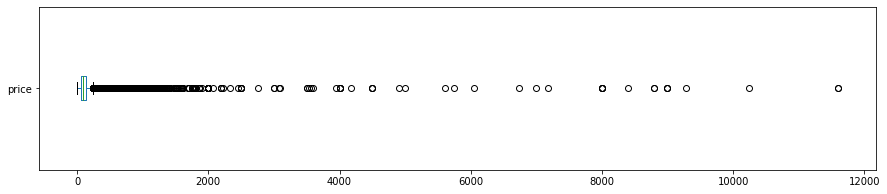


price: valores acima de 500
971 entradas
1.9714%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# Ver quantidade de valores acima de 500 Euros
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

#### Remoção de *outliers*

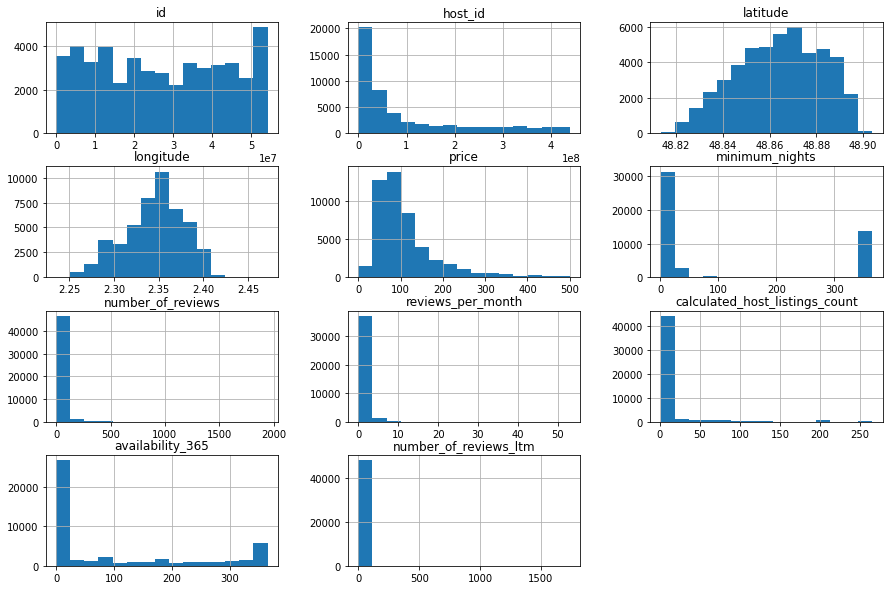

In [11]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 365]. index, axis=0, inplace=True)

# Remover 'neighbourhood_group'
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar o histograma sem os *outliers*
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [12]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.156729,0.023132,0.065616,0.162308,0.287617
minimum_nights,-0.156729,1.000000,-0.207504,-0.290854,-0.127603,-0.251998
number_of_reviews,0.023132,-0.207504,1.000000,0.616120,-0.016782,0.166289
reviews_per_month,0.065616,-0.290854,0.616120,1.000000,0.093246,0.288373
calculated_host_listings_count,0.162308,-0.127603,-0.016782,0.093246,1.000000,0.212775
availability_365,0.287617,-0.251998,0.166289,0.288373,0.212775,1.000000


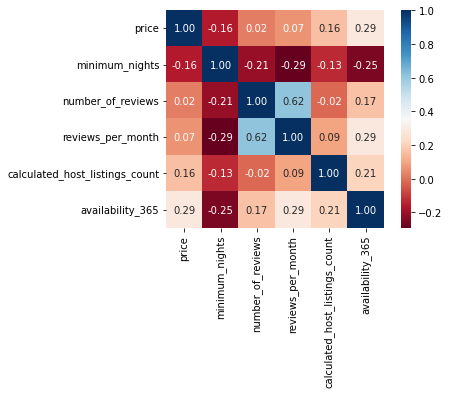

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [15]:
#Quantidade de cada tipo de imóvel
df_clean.room_type.value_counts() 

Entire home/apt    39918
Private room        6947
Hotel room          1087
Shared room          315
Name: room_type, dtype: int64

In [17]:
# % de cada imóvel
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    82.702468
Private room       14.392856
Hotel room          2.252056
Shared room         0.652620
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [19]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Louvre            164.471628
Élysée            162.827765
Luxembourg        147.519549
Hôtel-de-Ville    146.608318
Palais-Bourbon    146.151655
Temple            138.583557
Bourse            137.422018
Passy             133.827527
Panthéon          130.005254
Opéra             126.611488
Name: price, dtype: float64

Acima vemos que as maiores médias de preço estão em imóveis localizados ao centro de Paris e com fácil acesso a transporte e aos pontos turísticos da capital francesa. 

## Conclusões

Com esta análise superficial da base de dados oferecida, pudemos confirmar que existem *outliers* alterando algumas das variáveis como quantidade mínima de noites e preço.

Devido ao grande percentual de *outliers* na quantidade mínima de noites, foi interessante notar que mais de 28% dos imóveis estão listados para uma locação anual.

Por fim, lembra-se que foi análisado a versão resumida, ideal para uma abordagem inicial e que, se necessário, pode ser utilizado o conjunto de dados completos também disponível no mesmo site.